<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Projeto-Integrador-I/blob/main/PROJETO_Colaborativo_Genoma_C%C3%A2ncer_UFRSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

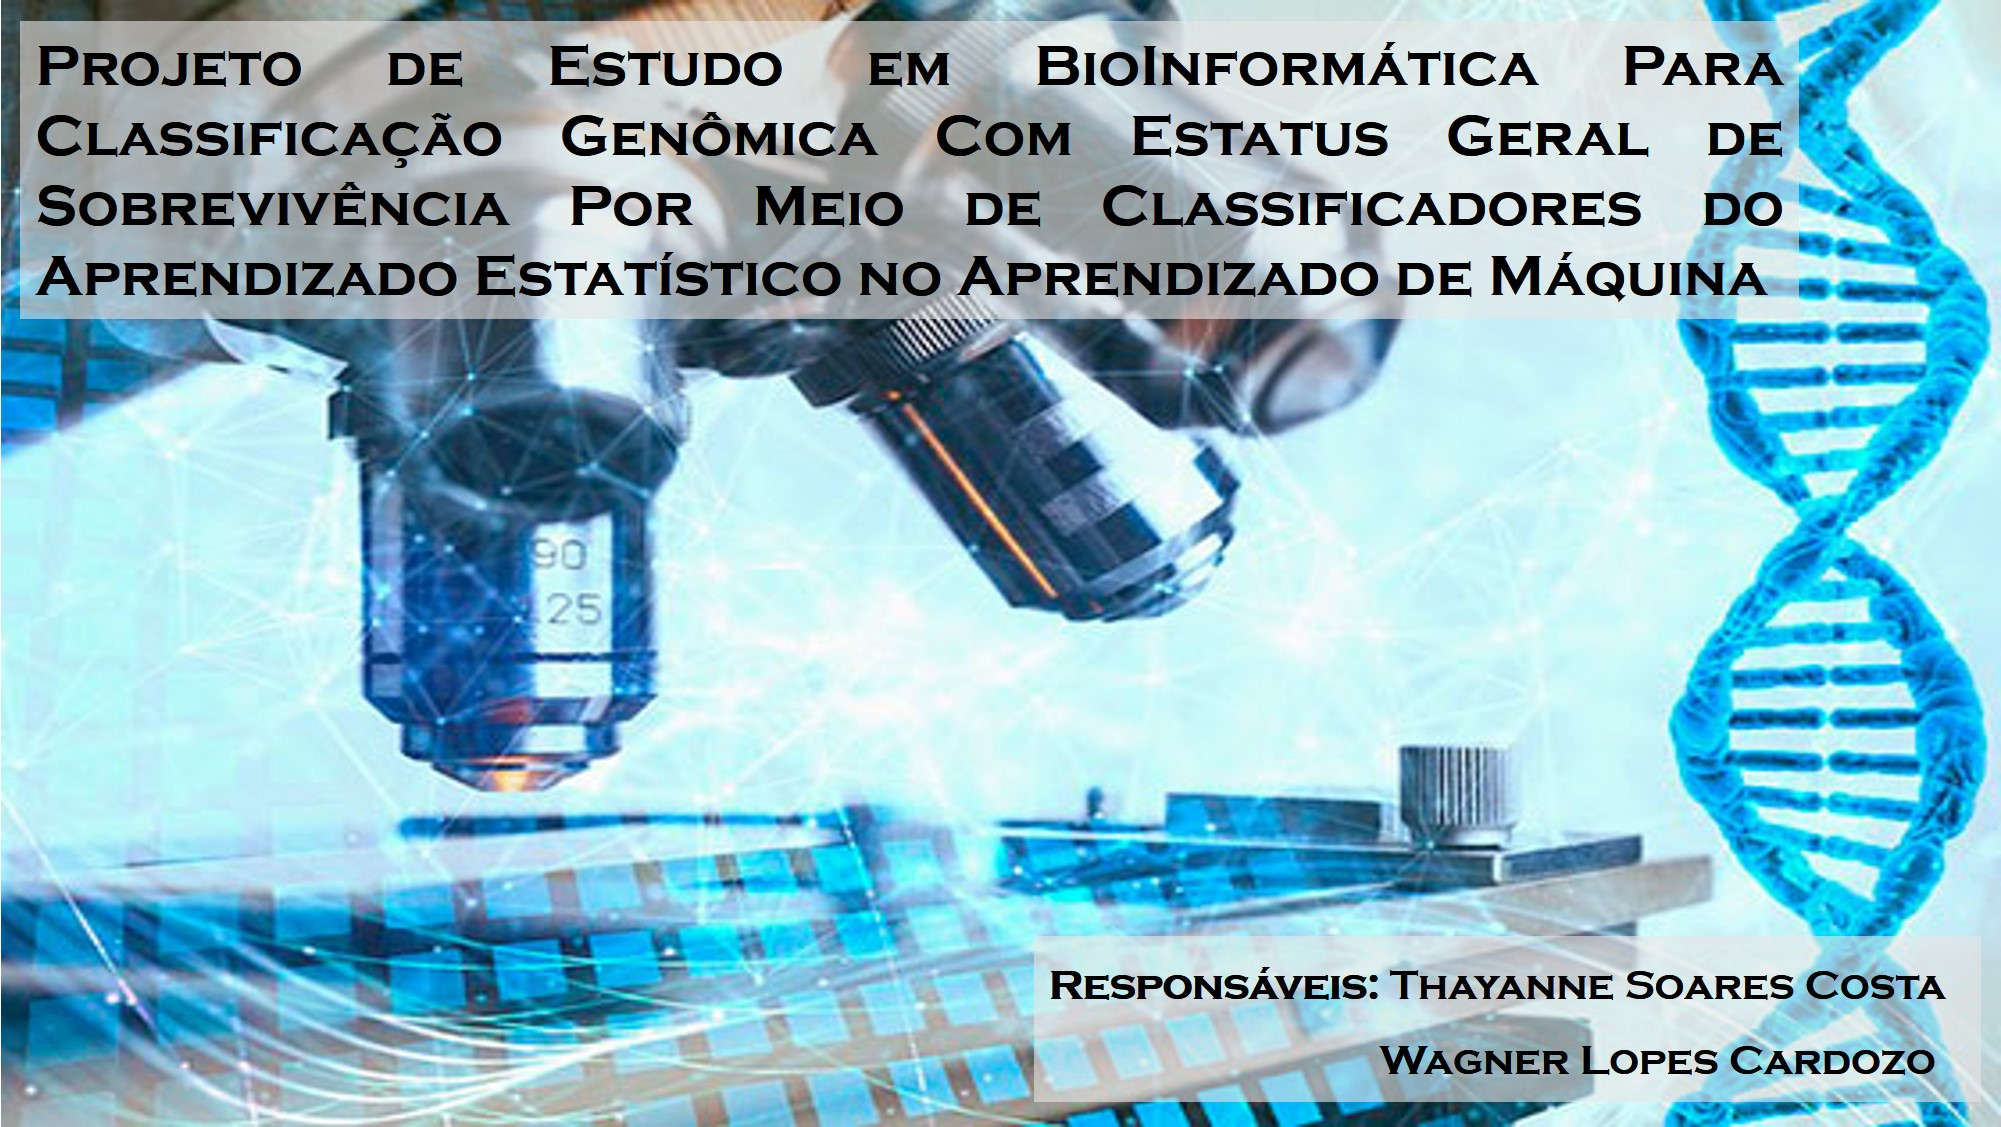

#Algoritmo Para Exibir a Tabela Com Somente os Dados Necessários.

In [ ]:
from google.colab import files
import pandas as pd

# Exiba uma mensagem agradável ao usuário
print("Selecione o arquivo com dados genéticos dos pacientes, obrigado!")

# Crie um formulário de upload de arquivo
uploaded = files.upload()

# Obtenha o nome do arquivo carregado
file_name = list(uploaded.keys())[0]

# Leia o arquivo .xlsx usando o pandas
df = pd.read_excel(file_name)

# Exiba as 20 primeiras linhas do arquivo
df.head(20)


Selecione o arquivo com dados genéticos dos pacientes, obrigado!


Saving Dados_Geneticos_Base_02_Normalizados.xlsx to Dados_Geneticos_Base_02_Normalizados (1).xlsx


,Study ID,Patient ID,Sample ID,Overall Survival (Months),Overall Survival Status
0,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB0O,TCGA-3G-AB0O-01,6858007036,0:LIVING
1,thym_tcga,TCGA-3G-AB0O,TCGA-3G-AB0O-01,68.53,0:LIVING
2,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB0Q,TCGA-3G-AB0Q-01,5914455732,0:LIVING
3,thym_tcga,TCGA-3G-AB0Q,TCGA-3G-AB0Q-01,59.1,0:LIVING
4,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB0T,TCGA-3G-AB0T-01,8179636388,1:DECEASED
5,thym_tcga,TCGA-3G-AB0T,TCGA-3G-AB0T-01,81.73,1:DECEASED
6,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB14,TCGA-3G-AB14-01,2547917283,1:DECEASED
7,thym_tcga,TCGA-3G-AB14,TCGA-3G-AB14-01,25.46,1:DECEASED
8,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB19,TCGA-3G-AB19-01,9567018444,1:DECEASED
9,thym_tcga,TCGA-3G-AB19,TCGA-3G-AB19-01,95.6,1:DECEASED


#Foi usado aqui as Distancias de Jaccard e Levenshtein (Para Classificar 20 Amostras Aleatórias em Relação as Demais Amostras):

A distância de Jaccard e a distância de Levenshtein são métricas de similaridade ou dissimilaridade usadas para comparar a semelhança entre conjuntos ou sequências de elementos, respectivamente.

1) Distância de Jaccard:

* A distância de Jaccard é usada para calcular a similaridade entre dois conjuntos.
* É definida como o tamanho da interseção dos conjuntos dividido pelo tamanho da união dos conjuntos.
* A fórmula da distância de Jaccard é: J(A, B) = |A ∩ B| / |A ∪ B|
* O resultado varia de 0 (completamente diferentes) a 1 (iguais).

Usos comuns:

* Comparação de documentos ou conjuntos de palavras-chave.
* Mineração de dados para análise de associação.

2) Distância de Levenshtein (ou distância de edição):

* A distância de Levenshtein é usada para medir a diferença entre duas sequências de caracteres (geralmente palavras ou frases).
* É definida como o número mínimo de operações (inserção, exclusão ou substituição de caracteres) necessárias para transformar uma sequência na outra.
* Também é conhecida como "distância de edição" porque representa o número mínimo de edições necessárias.

Usos comuns:

* Correção ortográfica.
* Alinhamento de sequências de DNA ou proteínas.
* Comparação de strings em algoritmos de pesquisa e recuperação de informações.

Ambas as métricas são úteis em diferentes contextos e podem ser aplicadas em problemas de análise de dados, processamento de linguagem natural, bioinformática e muitos outros campos onde a comparação de similaridade entre conjuntos ou sequências é necessária.

In [ ]:
# Instale a biblioteca python-Levenshtein
!pip install python-Levenshtein

from google.colab import files
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import jaccard
import Levenshtein

# Faça upload do arquivo .xlsx
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Carregue o arquivo em um DataFrame
df = pd.read_excel(file_name)

# Defina a coluna alvo
target_column = 'Overall Survival Status'

# Converta os valores da coluna alvo para 0 (living) e 1 (deceased)
df[target_column] = df[target_column].apply(lambda x: 0 if x == 'living' else 1)

# Escolha 20 amostras aleatórias para classificação
random_samples = df.sample(20)

# Calcule as distâncias de Jaccard e Levenshtein para as amostras selecionadas
jaccard_distances = []
levenshtein_distances = []

for _, sample in random_samples.iterrows():
    sample_values = sample.drop(target_column).values
    jaccard_dists = [jaccard(sample_values, row.drop(target_column).values) for _, row in df.iterrows()]
    levenshtein_dists = [Levenshtein.distance(sample_values, row.drop(target_column).values) for _, row in df.iterrows()]

    min_jaccard_index = np.argmin(jaccard_dists)
    min_levenshtein_index = np.argmin(levenshtein_dists)

    jaccard_distances.append((min_jaccard_index, jaccard_dists[min_jaccard_index]))
    levenshtein_distances.append((min_levenshtein_index, levenshtein_dists[min_levenshtein_index]))

# Ordene as amostras com base nas distâncias de Jaccard e Levenshtein
sorted_jaccard_samples = [df.iloc[index] for index, _ in jaccard_distances]
sorted_levenshtein_samples = [df.iloc[index] for index, _ in levenshtein_distances]

# Exiba a classificação das amostras com base nas distâncias de Jaccard
print("Classificação das 20 amostras aleatórias com base na distância de Jaccard:")
for i, sample in enumerate(sorted_jaccard_samples, start=1):
    status_str = 'deceased' if sample[target_column] == 1 else 'living'
    print(f"Amostra {i}: {status_str}")

# Exiba a classificação das amostras com base nas distâncias de Levenshtein
print("\nClassificação das 20 amostras aleatórias com base na distância de Levenshtein:")
for i, sample in enumerate(sorted_levenshtein_samples, start=1):
    status_str = 'deceased' if sample[target_column] == 1 else 'living'
    print(f"Amostra {i}: {status_str}")


Saving Dados_Geneticos_Base_02_Normalizados.xlsx to Dados_Geneticos_Base_02_Normalizados (20).xlsx
Classificação das 20 amostras aleatórias com base na distância de Jaccard:
Amostra 1: deceased
Amostra 2: deceased
Amostra 3: deceased
Amostra 4: deceased
Amostra 5: deceased
Amostra 6: deceased
Amostra 7: deceased
Amostra 8: deceased
Amostra 9: deceased
Amostra 10: deceased
Amostra 11: deceased
Amostra 12: deceased
Amostra 13: deceased
Amostra 14: deceased
Amostra 15: deceased
Amostra 16: deceased
Amostra 17: deceased
Amostra 18: deceased
Amostra 19: deceased
Amostra 20: deceased

Classificação das 20 amostras aleatórias com base na distância de Levenshtein:
Amostra 1: deceased
Amostra 2: deceased
Amostra 3: deceased
Amostra 4: deceased
Amostra 5: deceased
Amostra 6: deceased
Amostra 7: deceased
Amostra 8: deceased
Amostra 9: deceased
Amostra 10: deceased
Amostra 11: deceased
Amostra 12: deceased
Amostra 13: deceased
Amostra 14: deceased
Amostra 15: deceased
Amostra 16: deceased
Amostra 

#É de se desconfiar, Pois em Estatística as Medidas de Avaliação do Modelo Matemático Quando Dão 100% Pode Ser que o Modelo Não Está Classificando Corretamente (Generalizando):

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import jaccard
import Levenshtein
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score

# Instale a biblioteca python-Levenshtein
!pip install python-Levenshtein

# Função para calcular métricas de classificação
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return accuracy, balanced_accuracy, precision, f1, recall

# Faça upload do arquivo .xlsx
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Carregue o arquivo em um DataFrame
df = pd.read_excel(file_name)

# Defina a coluna alvo
target_column = 'Overall Survival Status'

# Converta os valores da coluna alvo para 0 (living) e 1 (deceased)
df[target_column] = df[target_column].apply(lambda x: 0 if x == 'living' else 1)

# Escolha 20 amostras aleatórias para classificação
random_samples = df.sample(20)

# Calcule as distâncias de Jaccard e Levenshtein para as amostras selecionadas
jaccard_distances = []
levenshtein_distances = []

for _, sample in random_samples.iterrows():
    sample_values = sample.drop(target_column).values
    jaccard_dists = [jaccard(sample_values, row.drop(target_column).values) for _, row in df.iterrows()]
    levenshtein_dists = [Levenshtein.distance(sample_values, row.drop(target_column).values) for _, row in df.iterrows()]

    min_jaccard_index = np.argmin(jaccard_dists)
    min_levenshtein_index = np.argmin(levenshtein_dists)

    jaccard_distances.append((min_jaccard_index, jaccard_dists[min_jaccard_index]))
    levenshtein_distances.append((min_levenshtein_index, levenshtein_dists[min_levenshtein_index]))

# Ordene as amostras com base nas distâncias de Jaccard e Levenshtein
sorted_jaccard_samples = [df.iloc[index] for index, _ in jaccard_distances]
sorted_levenshtein_samples = [df.iloc[index] for index, _ in levenshtein_distances]

# Obtenha as classificações das amostras
jaccard_predictions = [sample[target_column] for sample in sorted_jaccard_samples]
levenshtein_predictions = [sample[target_column] for sample in sorted_levenshtein_samples]

# Calcula métricas de classificação
jaccard_metrics = calculate_metrics(random_samples[target_column], jaccard_predictions)
levenshtein_metrics = calculate_metrics(random_samples[target_column], levenshtein_predictions)

# Exiba as métricas de classificação
print("Métricas de classificação com base na distância de Jaccard:")
print("Acurácia:", jaccard_metrics[0])
print("Acurácia Balanceada:", jaccard_metrics[1])
print("Precisão:", jaccard_metrics[2])
print("F1 Score:", jaccard_metrics[3])
print("Recall:", jaccard_metrics[4])

print("\nMétricas de classificação com base na distância de Levenshtein:")
print("Acurácia:", levenshtein_metrics[0])
print("Acurácia Balanceada:", levenshtein_metrics[1])
print("Precisão:", levenshtein_metrics[2])
print("F1 Score:", levenshtein_metrics[3])
print("Recall:", levenshtein_metrics[4])


Saving Dados_Geneticos_Base_02_Normalizados.xlsx to Dados_Geneticos_Base_02_Normalizados (22).xlsx
Métricas de classificação com base na distância de Jaccard:
Acurácia: 1.0
Acurácia Balanceada: 1.0
Precisão: 1.0
F1 Score: 1.0
Recall: 1.0

Métricas de classificação com base na distância de Levenshtein:
Acurácia: 1.0
Acurácia Balanceada: 1.0
Precisão: 1.0
F1 Score: 1.0
Recall: 1.0


#Feito a Remoção de Todo Texto da Coluna Overall Survival Status Para que se Possa Aplicar a Distância Euclidiana Por Meio do KNN

In [ ]:
from google.colab import files
import pandas as pd

# Exiba uma mensagem agradável ao usuário
print("Selecione o arquivo com dados genéticos dos pacientes, obrigado!")

# Crie um formulário de upload de arquivo
uploaded = files.upload()

# Obtenha o nome do arquivo carregado
file_name = list(uploaded.keys())[0]

# Leia o arquivo .xlsx usando o pandas
df = pd.read_excel(file_name)

# Remove qualquer texto na coluna 'Overall Survival Status' e mantém apenas os valores numéricos
df['Overall Survival Status'] = df['Overall Survival Status'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else x)

# Exiba as 20 primeiras linhas do arquivo
df.head(20)

Selecione o arquivo com dados genéticos dos pacientes, obrigado!


Saving Dados_Geneticos_Base_02_Normalizados.xlsx to Dados_Geneticos_Base_02_Normalizados (28).xlsx


,Study ID,Patient ID,Sample ID,Overall Survival (Months),Overall Survival Status
0,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB0O,TCGA-3G-AB0O-01,6858007036,0
1,thym_tcga,TCGA-3G-AB0O,TCGA-3G-AB0O-01,68.53,0
2,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB0Q,TCGA-3G-AB0Q-01,5914455732,0
3,thym_tcga,TCGA-3G-AB0Q,TCGA-3G-AB0Q-01,59.1,0
4,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB0T,TCGA-3G-AB0T-01,8179636388,1
5,thym_tcga,TCGA-3G-AB0T,TCGA-3G-AB0T-01,81.73,1
6,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB14,TCGA-3G-AB14-01,2547917283,1
7,thym_tcga,TCGA-3G-AB14,TCGA-3G-AB14-01,25.46,1
8,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB19,TCGA-3G-AB19-01,9567018444,1
9,thym_tcga,TCGA-3G-AB19,TCGA-3G-AB19-01,95.6,1


#Algoritmo Para Além de Tirar Todo o Texto da Coluna Overall Survival Status, Faz o Download da Nova Tabela Para o Computador Local, Permitindo Escolher Onde Salvar o Arquivo.

In [ ]:
from google.colab import files
import pandas as pd
import re

# Exiba uma mensagem agradável ao usuário
print("Selecione o arquivo com dados genéticos dos pacientes, obrigado!")

# Crie um formulário de upload de arquivo
uploaded = files.upload()

# Obtenha o nome do arquivo carregado
file_name = list(uploaded.keys())[0]

# Leia o arquivo .xlsx usando o pandas
df = pd.read_excel(file_name)

# Remove qualquer texto na coluna 'Overall Survival Status' e mantém apenas os valores numéricos
df['Overall Survival Status'] = df['Overall Survival Status'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else x)

# Salve todas as linhas no arquivo .xlsx
df.to_excel("tabela_completa.xlsx", index=False)

# Permita que o usuário faça o download do arquivo
files.download("tabela_completa.xlsx")


Selecione o arquivo com dados genéticos dos pacientes, obrigado!


Saving Dados_Geneticos_Base_02_Normalizados.xlsx to Dados_Geneticos_Base_02_Normalizados (31).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Visualizando de Novo a Tabela Para saber se de Fato Foi Feito a Limpeza do Texto na Coluna Overall Survival Status Para que se Possa Aplicar a Distância Euclidiana (KNN).

In [ ]:
from google.colab import files
import pandas as pd

# Exiba uma mensagem agradável ao usuário
print("Selecione o arquivo com dados genéticos dos pacientes, obrigado!")

# Crie um formulário de upload de arquivo
uploaded = files.upload()

# Obtenha o nome do arquivo carregado
file_name = list(uploaded.keys())[0]

# Leia o arquivo .xlsx usando o pandas
df = pd.read_excel(file_name)

# Exiba as 20 primeiras linhas do arquivo
df.head(20)

Selecione o arquivo com dados genéticos dos pacientes, obrigado!


Saving tabela_completa.xlsx to tabela_completa (1).xlsx


,Study ID,Patient ID,Sample ID,Overall Survival (Months),Overall Survival Status
0,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB0O,TCGA-3G-AB0O-01,6858007036,0
1,thym_tcga,TCGA-3G-AB0O,TCGA-3G-AB0O-01,68.53,0
2,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB0Q,TCGA-3G-AB0Q-01,5914455732,0
3,thym_tcga,TCGA-3G-AB0Q,TCGA-3G-AB0Q-01,59.1,0
4,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB0T,TCGA-3G-AB0T-01,8179636388,1
5,thym_tcga,TCGA-3G-AB0T,TCGA-3G-AB0T-01,81.73,1
6,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB14,TCGA-3G-AB14-01,2547917283,1
7,thym_tcga,TCGA-3G-AB14,TCGA-3G-AB14-01,25.46,1
8,thym_tcga_pan_can_atlas_2018,TCGA-3G-AB19,TCGA-3G-AB19-01,9567018444,1
9,thym_tcga,TCGA-3G-AB19,TCGA-3G-AB19-01,95.6,1


#A Distância Euclidiana é Aplicada no Método de Classificação KNN, Porém para Esta Amostra o Número de Exemplos é Considerado Muito Pequeno, Não Tendo Número Suficiente Para Treinar o Classificador KNN, Então ou Teremos que Conseguir uma Base de Dados Maior ou Aumentar a Base de Dados com a Técnica de Data Augmentation, que Pode Ser Bom ou Não.

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score

# Exiba uma mensagem agradável ao usuário
print("Selecione o arquivo com dados genéticos dos pacientes, obrigado!")

# Crie um formulário de upload de arquivo
uploaded = files.upload()

# Obtenha o nome do arquivo carregado
file_name = list(uploaded.keys())[0]

# Leia o arquivo .xlsx usando o pandas
df = pd.read_excel(file_name)

# Limpe a coluna 'Overall Survival Status' para conter apenas 0 ou 1
df['Overall Survival Status'] = df['Overall Survival Status'].apply(lambda x: 1 if 'deceased' in str(x).lower() else 0 if 'living' in str(x).lower() else -1)

# Remova todas as linhas com valores não numéricos na coluna 'Overall Survival Status'
df = df[df['Overall Survival Status'].isin([0, 1])]

# Verifique se há pelo menos cinco amostras válidas
if len(df) < 5:
    print("Não há amostras suficientes no arquivo para realizar a classificação.")
else:
    # Escolha cinco amostras para classificação
    samples_to_classify = df.sample(5, random_state=42)

    # Restante das amostras para treinamento e teste
    train_samples = df.drop(samples_to_classify.index)

    # Use apenas colunas numéricas nas características
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    X_train, X_test, y_train, y_test = train_test_split(train_samples[numerical_columns].drop('Overall Survival Status', axis=1), train_samples['Overall Survival Status'], test_size=0.2, random_state=42)

    # Crie um classificador KNN e ajuste-o aos dados de treinamento
    knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    knn.fit(X_train, y_train)

    # Faça a previsão para as cinco amostras selecionadas
    y_pred = knn.predict(samples_to_classify[numerical_columns].drop('Overall Survival Status', axis=1))

    # Associe 0 a "Vivendo" e 1 a "Falecido"
    classification_results = ['Vivendo' if y == 0 else 'Falecido' for y in y_pred]

    print("Resultado da classificação das cinco amostras selecionadas:")
    for i, result in enumerate(classification_results, start=1):
        print(f"Amostra {i}: {result}")

    # Avaliação do modelo
    y_pred_test = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)

    print("\nMétricas de Avaliação do Modelo:")
    print(f"Acurácia: {accuracy:.2f}")
    print(f"Acurácia Balanceada: {balanced_accuracy:.2f}")
    print(f"Precisão: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Recall: {recall:.2f}")


Selecione o arquivo com dados genéticos dos pacientes, obrigado!


Saving tabela_completa.xlsx to tabela_completa (19).xlsx
Não há amostras suficientes no arquivo para realizar a classificação.
